In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [4]:
df = pd.read_csv('churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
df.shape

(2666, 20)

In [7]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

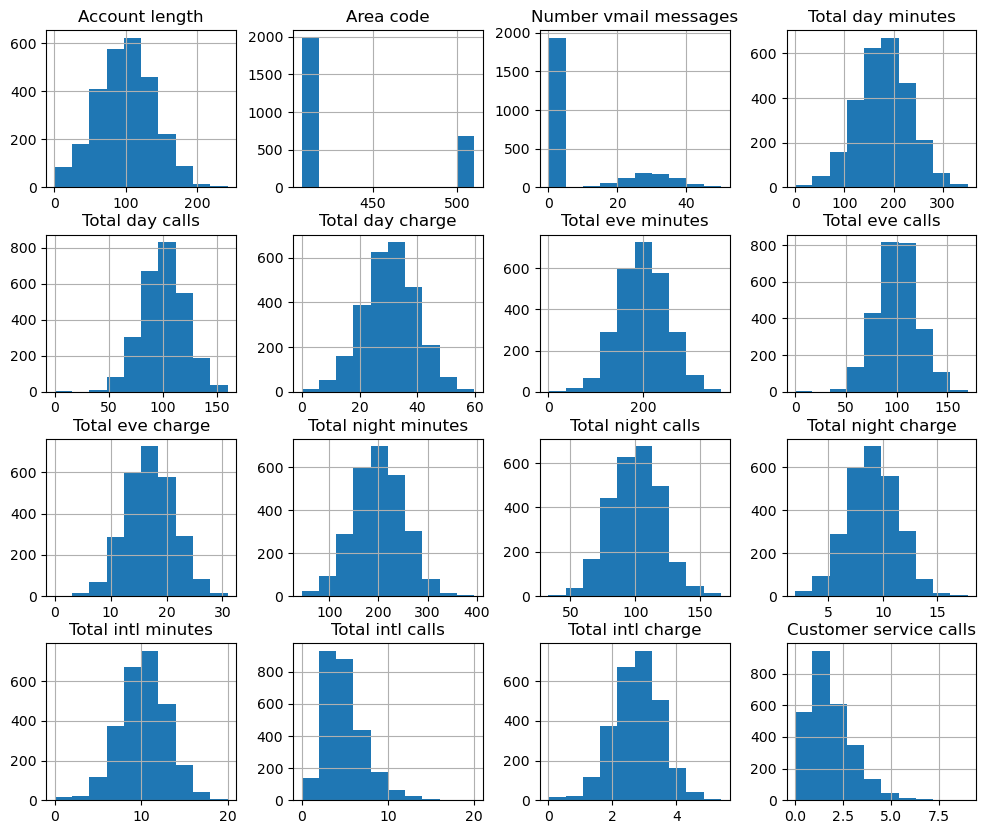

In [8]:
df.hist(figsize=(12, 10))
plt.show()

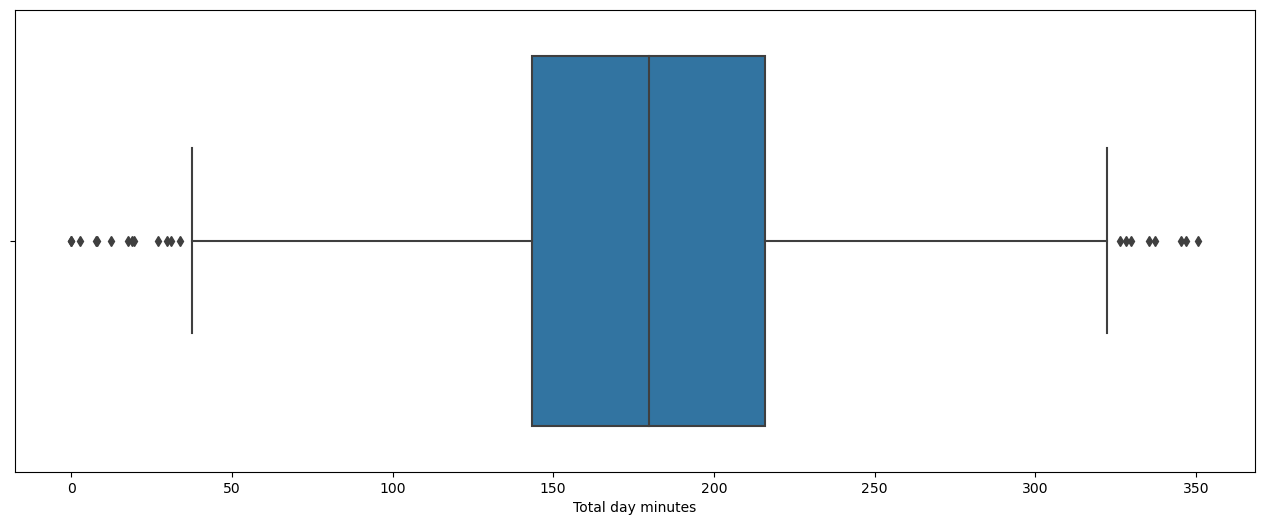

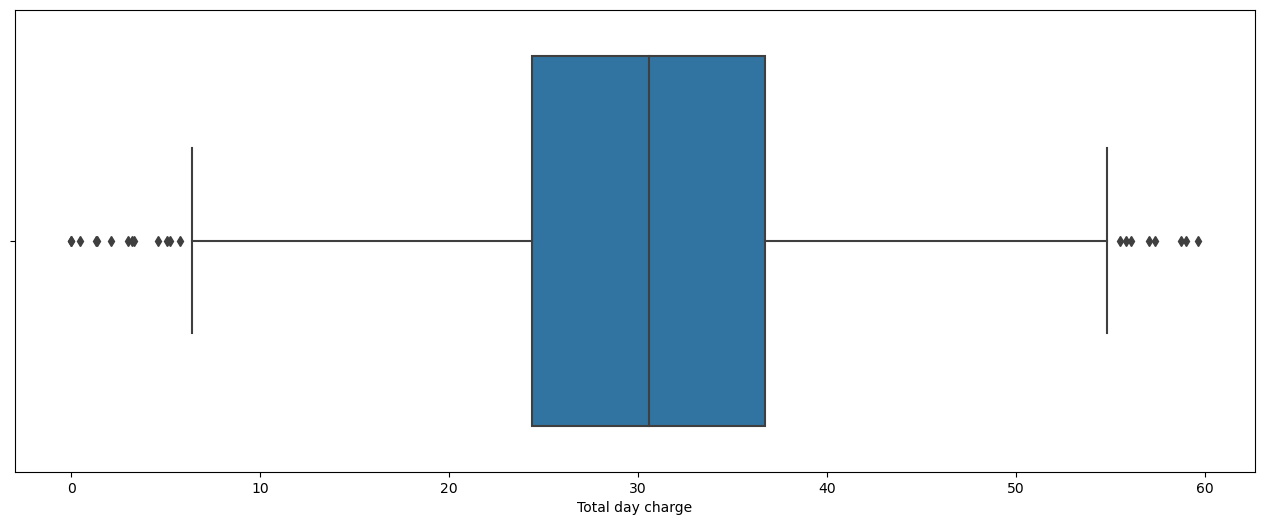

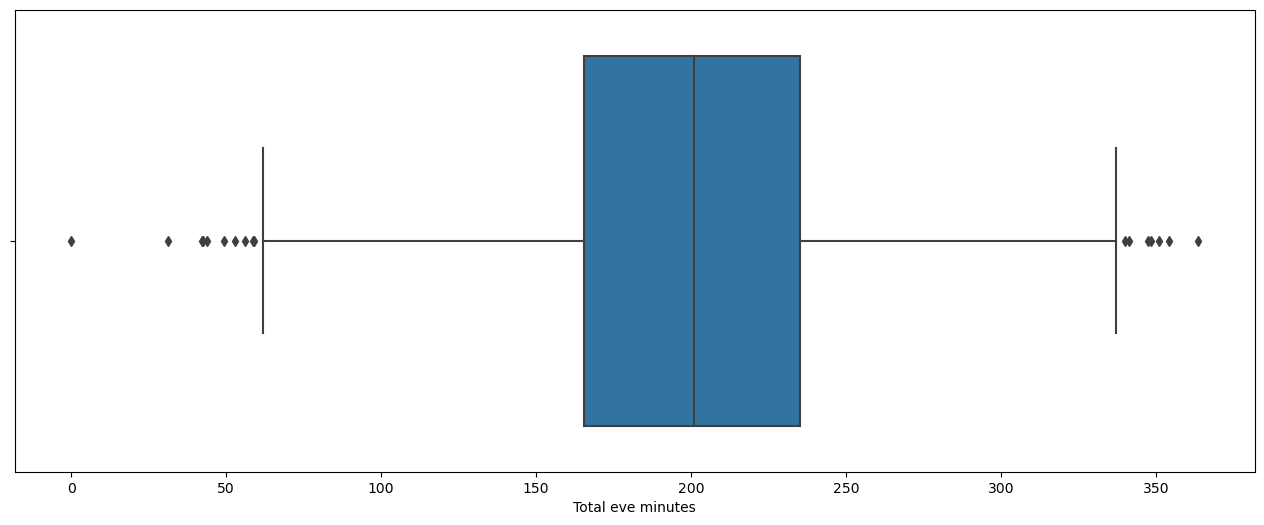

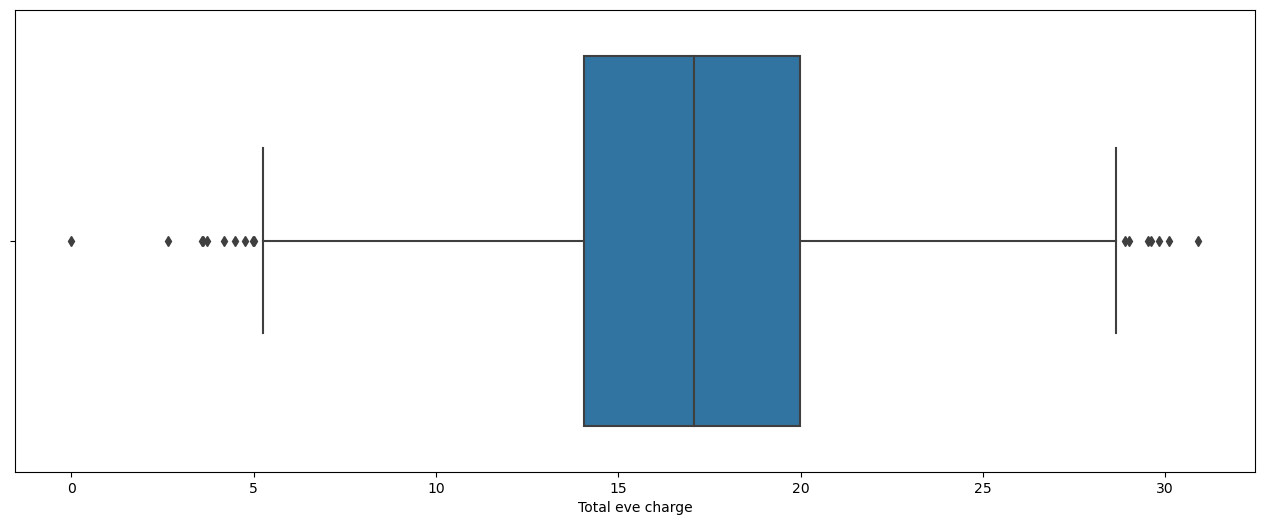

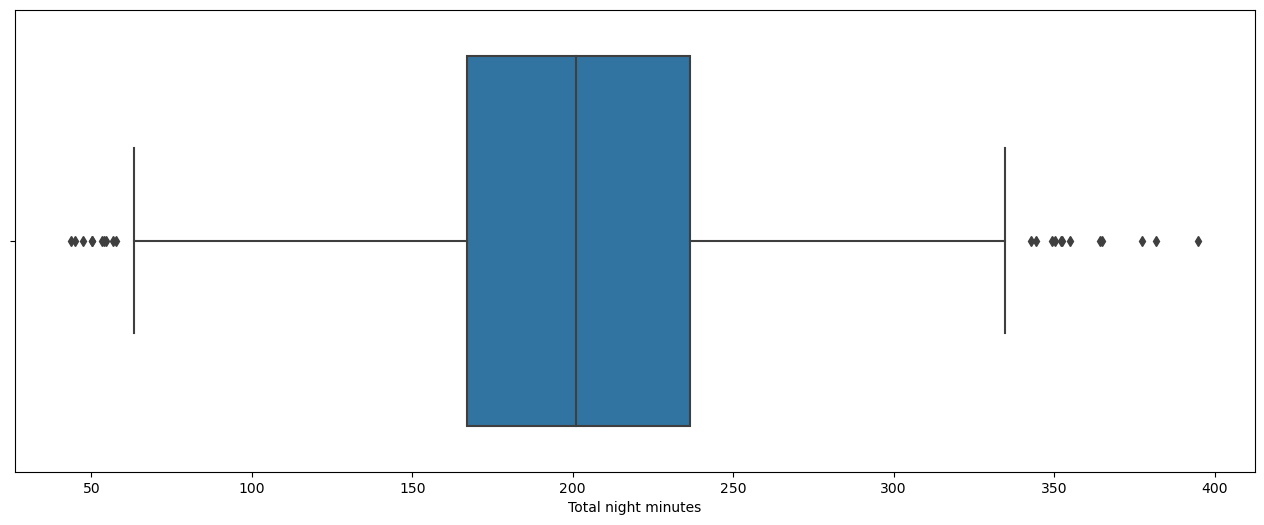

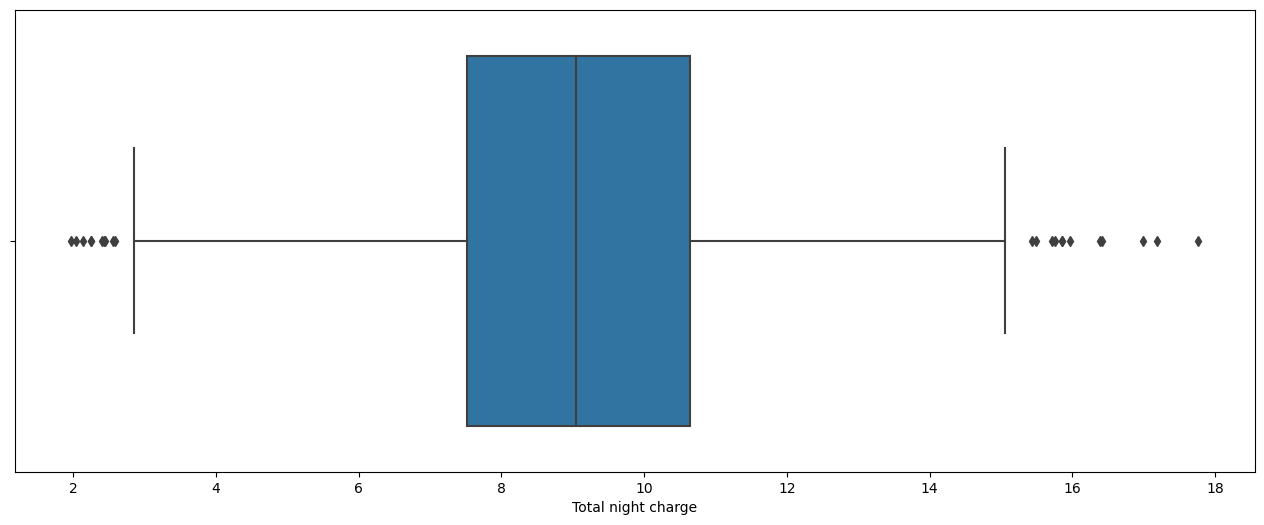

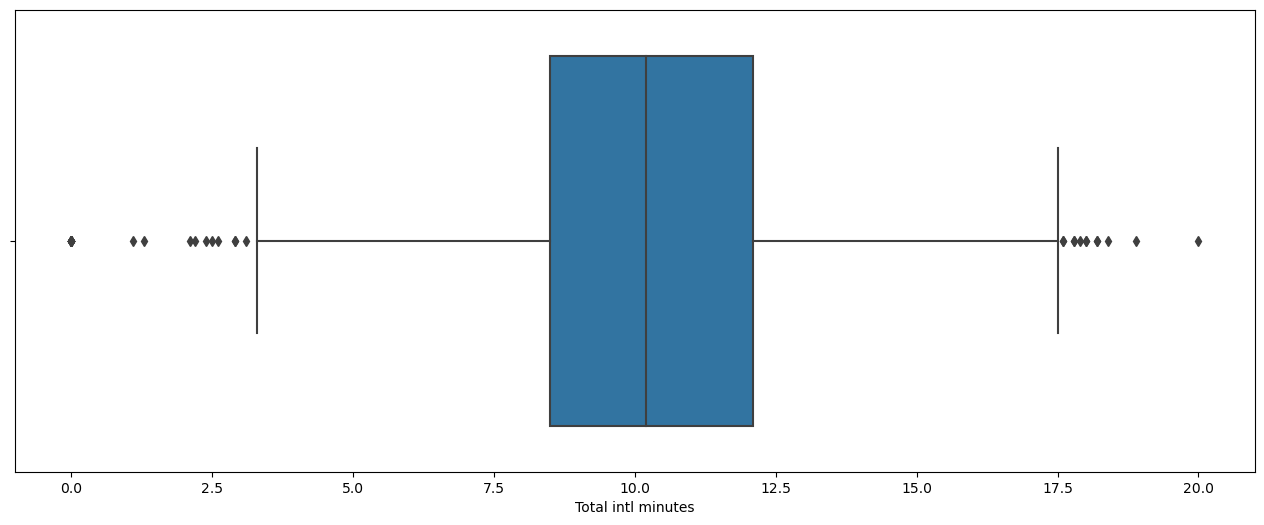

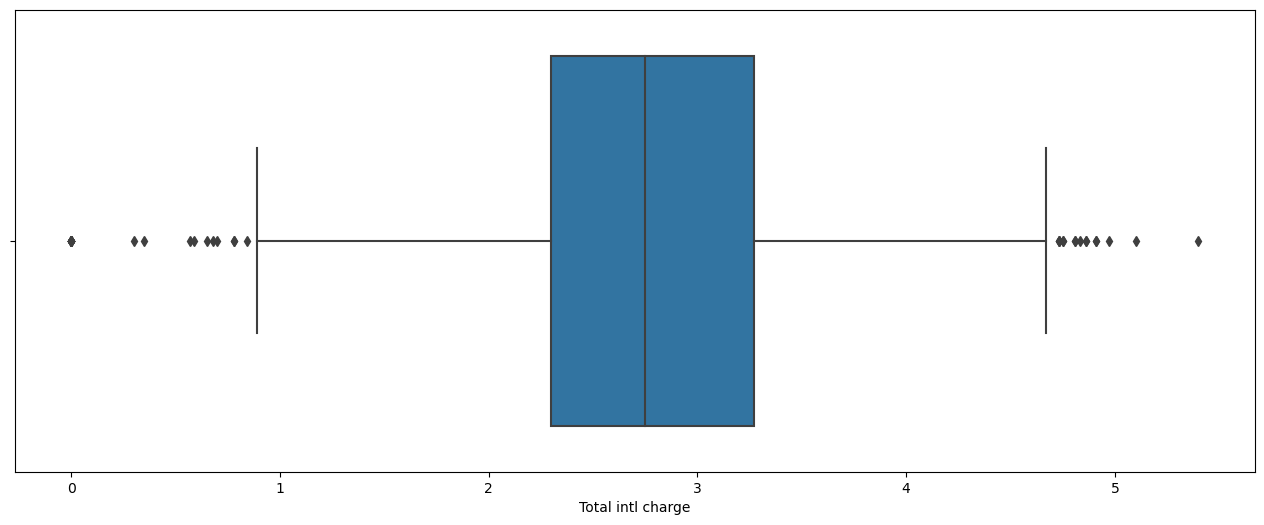

In [9]:
for col in df.columns:
    if (df[col].dtypes==int) or (df[col].dtypes==float):
        plt.figure(figsize=(16, 6))
        sns.boxplot(x=col, data=df)
        plt.show()

In [10]:
X_train=df.drop(["Churn"],axis=1)
y_train=df["Churn"]
X_test=pd.read_csv("churn-bigml-20.csv").drop(["Churn"],axis=1)
y_test=pd.read_csv("churn-bigml-20.csv")["Churn"]

In [11]:
X_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [12]:
X_train=pd.get_dummies(X_train, drop_first=True)
X_test=pd.get_dummies(X_test, drop_first=True)

In [13]:
X_train

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,0,0,0,0,0,0,0,0,0,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,0,0,0,0,0,1
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,0,0,0,0,1,0,0,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,0,0,0,0,0,0


In [14]:
lr = LogisticRegression(solver="liblinear" )
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
accuracy_score(y_test, y_lr)

0.848575712143928

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
accuracy_score(y_test, y_rf)

0.9400299850074962

In [16]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
accuracy_score(y_test, y_xgb)

0.9565217391304348

In [17]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       572
        True       0.41      0.15      0.22        95

    accuracy                           0.85       667
   macro avg       0.64      0.56      0.57       667
weighted avg       0.81      0.85      0.82       667



In [18]:
print(confusion_matrix(y_test,y_lr))

[[552  20]
 [ 81  14]]


In [19]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

       False       0.94      0.99      0.97       572
        True       0.95      0.61      0.74        95

    accuracy                           0.94       667
   macro avg       0.94      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667



In [20]:
print(confusion_matrix(y_test, y_rf))

[[569   3]
 [ 37  58]]


In [21]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       572
        True       0.91      0.77      0.83        95

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.90       667
weighted avg       0.96      0.96      0.95       667



In [22]:
print(confusion_matrix(y_test, y_xgb))

[[565   7]
 [ 22  73]]
